In [1]:
import pandas as pd

# Load CSV files
call_df = pd.read_csv('/Users/sebastianbayne/Documents/WBS/Bootcamp/Final_Project /Datasets /Call Center/Call_Center_Final/Updated_Call_log.csv')
user_df = pd.read_csv('/Users/sebastianbayne/Documents/WBS/Bootcamp/Final_Project /Datasets /Call Center/Call_Center_Final/User_experience.csv')
res_df = pd.read_csv('/Users/sebastianbayne/Documents/WBS/Bootcamp/Final_Project /Datasets /Call Center/Call_Center_Final/Call_Resolution_type.csv')
type_df = pd.read_csv('/Users/sebastianbayne/Documents/WBS/Bootcamp/Final_Project /Datasets /Call Center/Call_Center_Final/Call_Type.csv')
plan_df = pd.read_csv('/Users/sebastianbayne/Documents/WBS/Bootcamp/Final_Project /Datasets /Call Center/Call_Center_Final/Wireless_Plans.csv')

In [2]:
# Filtering the call_df to include only emotion datat = "anger"
anger_df = call_df[call_df['Emotion'] == 'anger']

In [3]:
# Convert "Call_Date" to datetime format
call_df["Call_Date"] = pd.to_datetime(call_df["Call_Date"])

In [4]:
# Counting the number of angry calls for each agent
calls_per_agent = anger_df['Agent_ID'].value_counts().reset_index()
calls_per_agent.columns = ['Agent_ID', 'Angry_Calls_Count']

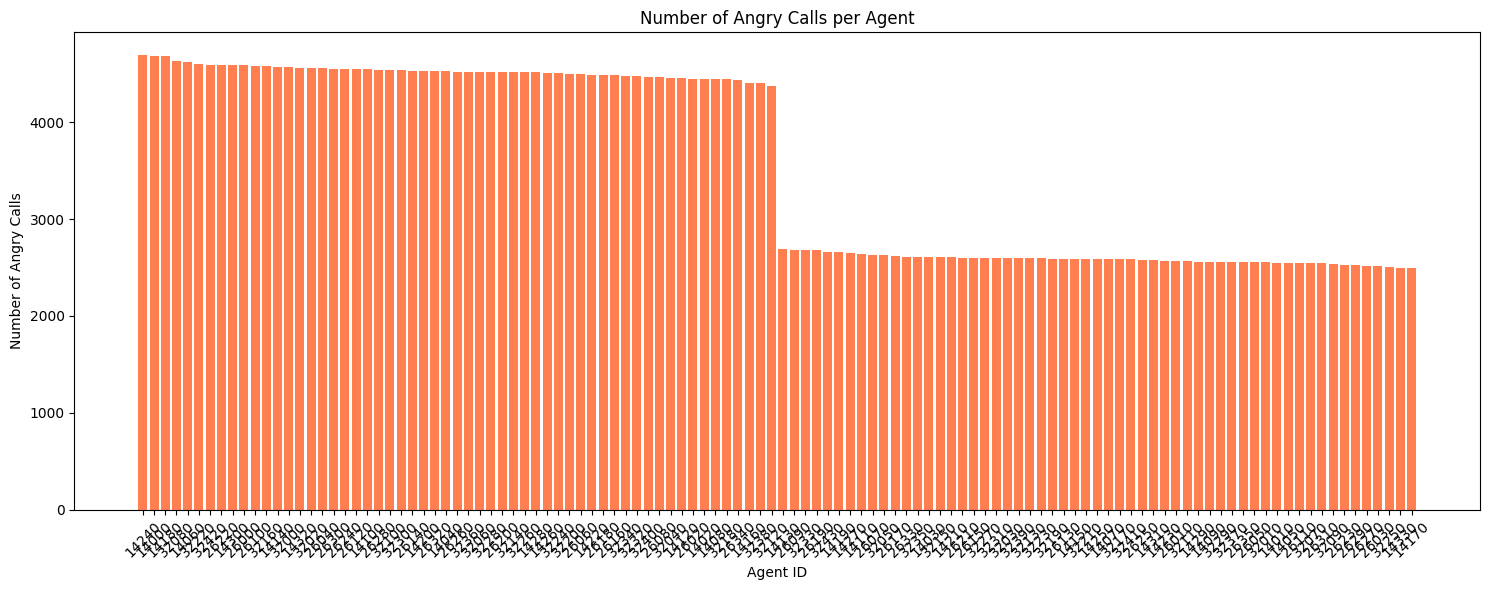

In [5]:
import matplotlib.pyplot as plt

# Plotting the number of angry calls per agent
plt.figure(figsize=(15, 6))
plt.bar(calls_per_agent['Agent_ID'].astype(str), calls_per_agent['Angry_Calls_Count'], color='coral')
plt.title('Number of Angry Calls per Agent')
plt.xlabel('Agent ID')
plt.ylabel('Number of Angry Calls')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [6]:
# Merging the main call_df with res_df on Call_resolution_ID to get resolution descriptions for all calls
all_resolutions = call_df.merge(res_df, on="Call_resolution_ID", how="left")

# Counting the number of occurrences for each resolution type grouped by emotion
emotion_resolution_counts = all_resolutions.groupby('Emotion')['Call_resolution_Description'].value_counts().unstack().fillna(0).astype(int)

emotion_resolution_counts


Call_resolution_Description,Call resolved by agent,Escalated to Supervisor,Transferred to other agent
Emotion,,,
anger,303917,41900,59618
fear,51707,7121,10144
happiness,65260,8993,12744
neutral,535154,73945,103800
sadness,51946,7032,9971


In [7]:
# Calculating the percentages of each resolution type within each emotion
emotion_resolution_percent_within = (emotion_resolution_counts.divide(emotion_resolution_counts.sum(axis=1), axis=0)) * 100
emotion_resolution_percent_within = emotion_resolution_percent_within.round(2)

emotion_resolution_percent_within


Call_resolution_Description,Call resolved by agent,Escalated to Supervisor,Transferred to other agent
Emotion,,,
anger,74.96,10.33,14.70
fear,74.97,10.32,14.71
happiness,75.01,10.34,14.65
neutral,75.07,10.37,14.56
sadness,75.34,10.20,14.46


In [8]:
# Grouping by resolution description and calculating the average talk time and queue time
avg_time_per_resolution = all_resolutions.groupby('Call_resolution_Description')[['Talk_Time', 'Queue_Time']].mean().round(2)

avg_time_per_resolution


,Talk_Time,Queue_Time
Call_resolution_Description,,
Call resolved by agent,846.33,15.46
Escalated to Supervisor,850.43,15.56
Transferred to other agent,863.57,16.07


In [9]:
# Grouping by resolution description and calculating the average talk time and queue time
avg_time_per_resolution = all_resolutions.groupby('Call_resolution_Description')[['Talk_Time', 'Queue_Time']].mean().round(2)

avg_time_per_resolution


,Talk_Time,Queue_Time
Call_resolution_Description,,
Call resolved by agent,846.33,15.46
Escalated to Supervisor,850.43,15.56
Transferred to other agent,863.57,16.07


In [10]:
# Merging anger_df with type_df on Call_Type_ID to get call type descriptions for angry calls
angry_call_types = anger_df.merge(type_df, on="Call_Type_ID", how="left")

# Counting the number of occurrences for each call type for angry calls
angry_call_type_counts = angry_call_types['Call_Type_Description'].value_counts().reset_index()
angry_call_type_counts.columns = ['Call_Type_Description', 'Angry_Calls_Count']

# Calculating the percentage of angry calls for each call type
total_calls_per_type = call_df.merge(type_df, on="Call_Type_ID", how="left")['Call_Type_Description'].value_counts()
angry_call_type_counts['Percentage_Angry'] = (angry_call_type_counts['Angry_Calls_Count'] / total_calls_per_type[angry_call_type_counts['Call_Type_Description']].values) * 100
angry_call_type_counts = angry_call_type_counts.round(2)

angry_call_type_counts


,Call_Type_Description,Angry_Calls_Count,Percentage_Angry
0,General Inquiries,124444,30.10
1,Billing & Payments,80548,30.23
2,Technical Support,77904,30.17
3,Products & Services,72503,30.25
4,Service Changes,50036,30.22


In [11]:
# Merging the main call_df with type_df on Call_Type_ID to get call type descriptions for all calls
all_calls_with_types = call_df.merge(type_df, on="Call_Type_ID", how="left")

# Counting the number of occurrences for each call type for all calls
all_call_type_counts = all_calls_with_types['Call_Type_Description'].value_counts().reset_index()
all_call_type_counts.columns = ['Call_Type_Description', 'Total_Calls_Count']

# Merging the angry calls count with the total calls count for each call type
call_type_comparison = angry_call_type_counts.merge(all_call_type_counts, on="Call_Type_Description", how="left")

# Calculating the percentage of calls that are angry for each call type
call_type_comparison['Percentage_of_Total'] = (call_type_comparison['Angry_Calls_Count'] / call_type_comparison['Total_Calls_Count']) * 100
call_type_comparison = call_type_comparison.round(2)

call_type_comparison[['Call_Type_Description', 'Angry_Calls_Count', 'Total_Calls_Count', 'Percentage_of_Total']]


,Call_Type_Description,Angry_Calls_Count,Total_Calls_Count,Percentage_of_Total
0,General Inquiries,124444,413383,30.10
1,Billing & Payments,80548,266448,30.23
2,Technical Support,77904,258177,30.17
3,Products & Services,72503,239691,30.25
4,Service Changes,50036,165553,30.22


In [29]:
# Grouping by call type description and calculating the average talk time and queue time
avg_time_per_call_type = all_calls_with_types.groupby('Call_Type_Description')[['Talk_Time', 'Queue_Time']].mean().round(2)
avg_time_per_call_type = avg_time_per_call_type.sort_values(by='Talk_Time', ascending=False)

avg_time_per_call_type


,Talk_Time,Queue_Time
Call_Type_Description,,
General Inquiries,849.96,15.55
Products & Services,849.58,16.19
Service Changes,849.07,15.58
Technical Support,848.90,14.94
Billing & Payments,848.42,15.61


In [32]:
# Grouping by call type and calculating the average talk time and queue time for angry calls
avg_time_angry_by_type = angry_call_types.groupby('Call_Type_Description')[['Talk_Time', 'Queue_Time']].mean().reset_index()

# Grouping by call type and calculating the average talk time and queue time for all calls
avg_time_all_by_type = all_calls_with_types.groupby('Call_Type_Description')[['Talk_Time', 'Queue_Time']].mean().reset_index()

# Merging the two datasets to create a comparison
type_comparison_df = avg_time_all_by_type.merge(avg_time_angry_by_type, on="Call_Type_Description", suffixes=('_All', '_Angry'))

type_comparison_df


,Call_Type_Description,Talk_Time_All,Queue_Time_All,Talk_Time_Angry,Queue_Time_Angry
0,Billing & Payments,848.419538,15.609383,853.236728,15.644088
1,General Inquiries,849.955729,15.550460,849.925083,15.556636
2,Products & Services,849.581152,16.187012,847.969174,16.156035
3,Service Changes,849.070618,15.575332,843.441362,15.534016
4,Technical Support,848.904259,14.942051,849.719835,14.983711


call times, over time, for one agent

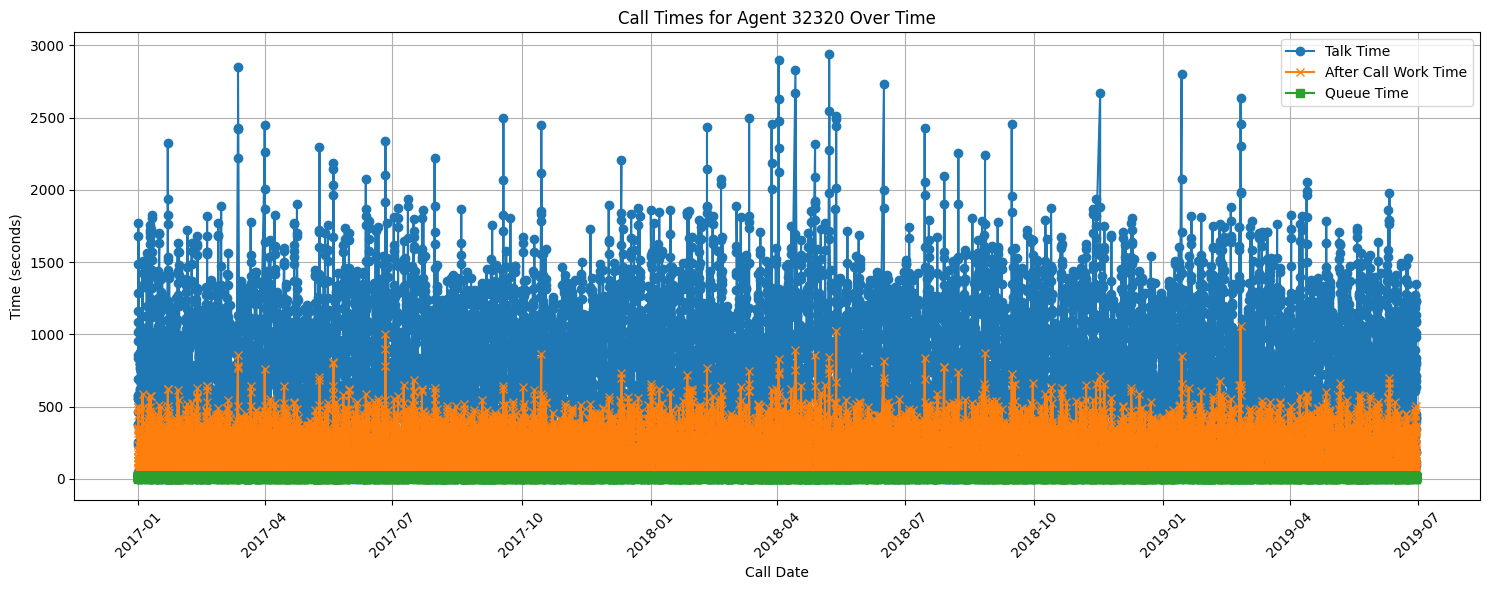

In [21]:
import matplotlib.pyplot as plt

def plot_call_times_for_agent(agent_id, df):
    # Filter data for the specific agent
    agent_data = df[df["Agent_ID"] == agent_id].sort_values(by="Call_Date")
    
    # Plotting
    plt.figure(figsize=(15, 6))
    plt.plot(agent_data["Call_Date"], agent_data["Talk_Time"], marker='o', label='Talk Time')
    plt.plot(agent_data["Call_Date"], agent_data["After_Call_Work_Time"], marker='x', label='After Call Work Time')
    plt.plot(agent_data["Call_Date"], agent_data["Queue_Time"], marker='s', label='Queue Time')
    
    plt.title(f"Call Times for Agent {agent_id} Over Time")
    plt.xlabel("Call Date")
    plt.ylabel("Time (seconds)")
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plotting for a sample agent ID, for demonstration
sample_agent_id = call_df["Agent_ID"].iloc[0]
plot_call_times_for_agent(sample_agent_id, call_df)


In [22]:
# Calculating the percentage of calls with talk time over specific durations
percentage_over_1800_sec = (len(call_df[call_df["Talk_Time"] > 1800]) / len(call_df)) * 100
percentage_over_48000_sec = (len(call_df[call_df["Talk_Time"] > 48000]) / len(call_df)) * 100

percentage_over_1800_sec, percentage_over_48000_sec


(7.076110811671972, 0.0)

In [19]:
pip install pydub midiutil



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [25]:
from midiutil import MIDIFile

def generate_midi(agent_id, df, path='sonified_data.mid'):
    # Filter data for the specific agent
    agent_data = df[df["Agent_ID"] == agent_id].sort_values(by="Call_Date")
    
    # Create a new MIDI file with one track
    midi = MIDIFile(1)
    track = 0
    midi.addTrackName(track, 0, "Track")
    midi.addTempo(track, 0, 120)  # 120 beats per minute
    
    # Middle C in MIDI is 60. We'll use 61 (C#) for calls over 1800 seconds
    base_note = 60
    high_note = 61
    
    for index, row in agent_data.iterrows():
        if row['Talk_Time'] > 1800:
            midi.addNote(track, 0, high_note, index, 1, 100)  # (track, channel, pitch, time, duration, volume)
        else:
            midi.addNote(track, 0, base_note, index, 1, 100)

    # Write the MIDI file to the specified path
    with open(path, "wb") as midi_file:
        midi.writeFile(midi_file)

# Example usage:
generate_midi(sample_agent_id, call_df, path="/Users/sebastianbayne/Documents/WBS/Bootcamp/Final_Project /Datasets/sonified_data.mid")


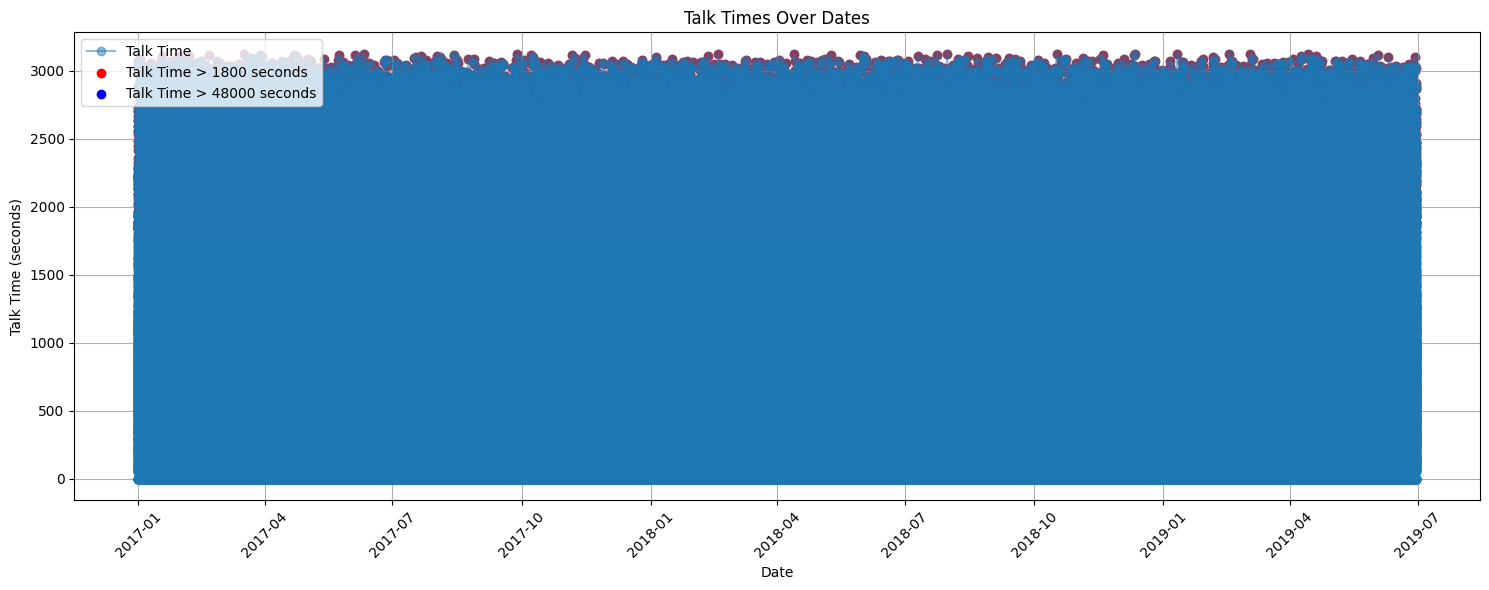

In [18]:
import matplotlib.pyplot as plt

# Load your dataframe here if it's not already loaded
# call_df = pd.read_csv('path_to_your_csv_file.csv')

# Convert 'Call_Date' column to datetime format
call_df['Call_Date'] = pd.to_datetime(call_df['Call_Date'])

# Plotting
plt.figure(figsize=(15, 6))

# Plotting talk times over dates
plt.plot(call_df["Call_Date"], call_df["Talk_Time"], marker='o', label='Talk Time', alpha=0.5)

# Highlighting calls that have talk times over 1800 seconds and 48000 seconds
over_1800_sec = call_df[call_df["Talk_Time"] > 1800]
over_48000_sec = call_df[call_df["Talk_Time"] > 48000]

plt.scatter(over_1800_sec["Call_Date"], over_1800_sec["Talk_Time"], color='red', label=f'Talk Time > 1800 seconds')
plt.scatter(over_48000_sec["Call_Date"], over_48000_sec["Talk_Time"], color='blue', label=f'Talk Time > 48000 seconds')

plt.title("Talk Times Over Dates")
plt.xlabel("Date")
plt.ylabel("Talk Time (seconds)")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()



only talk time  

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: Futur

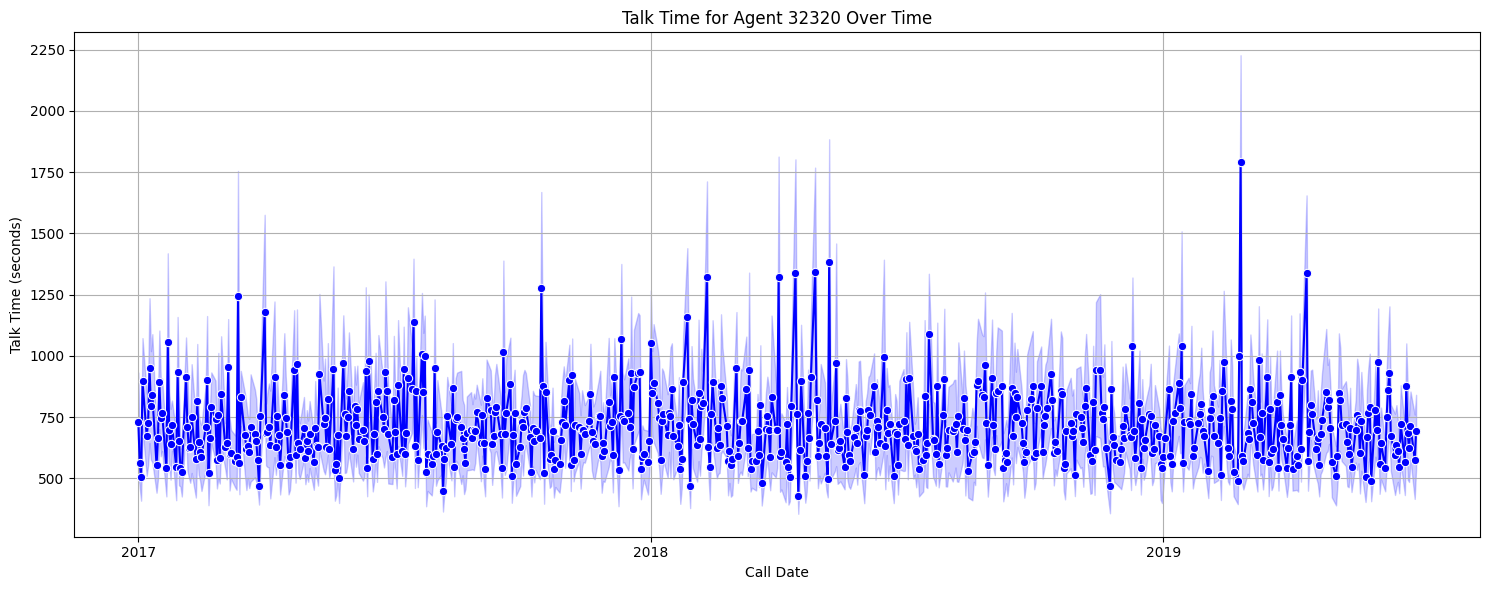

In [ ]:

# Plotting using Seaborn after converting "Call_Date" to datetime
plot_talk_time_with_seaborn(sample_agent_id, call_df)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: Futur

NameError: name 'mdates' is not defined

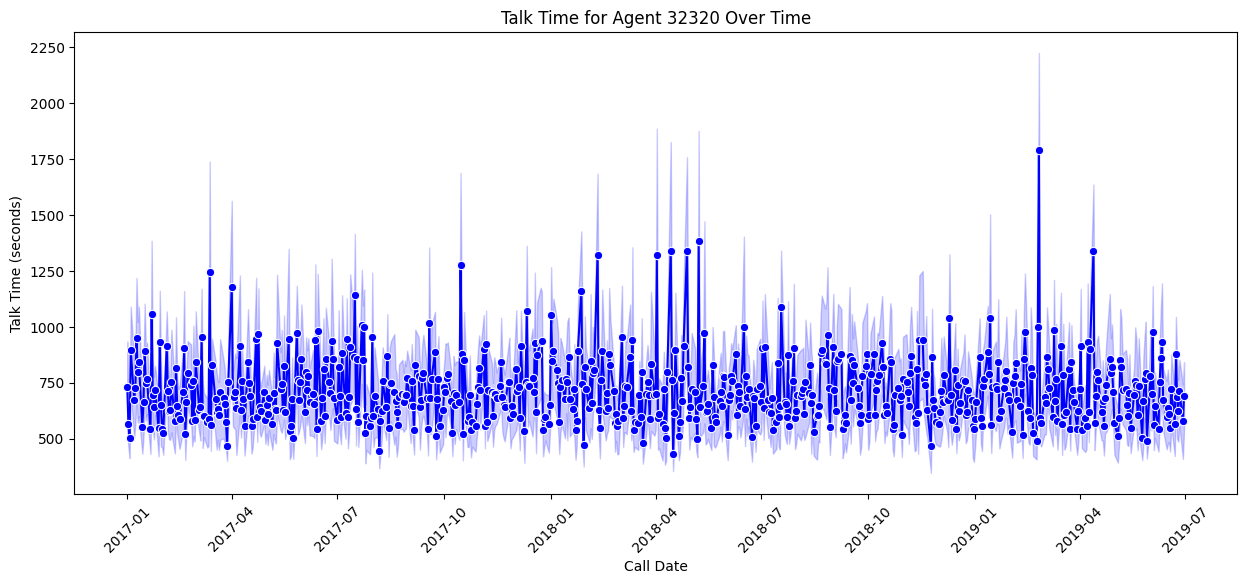

In [ ]:
def plot_talk_time_with_months(agent_id, df):
    # Filter data for the specific agent
    agent_data = df[df["Agent_ID"] == agent_id].sort_values(by="Call_Date")
    
    # Plotting
    plt.figure(figsize=(15, 6))
    sns.lineplot(x="Call_Date", y="Talk_Time", data=agent_data, marker='o', color='blue')
    
    plt.title(f"Talk Time for Agent {agent_id} Over Time")
    plt.xlabel("Call Date")
    plt.ylabel("Talk Time (seconds)")
    
    # Setting x-ticks to show months and years
    plt.xticks(rotation=45)
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plotting using Seaborn for the sample agent ID with month-wise x-tick labels
plot_talk_time_with_months(sample_agent_id, call_df)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

NameError: name 'mdates' is not defined

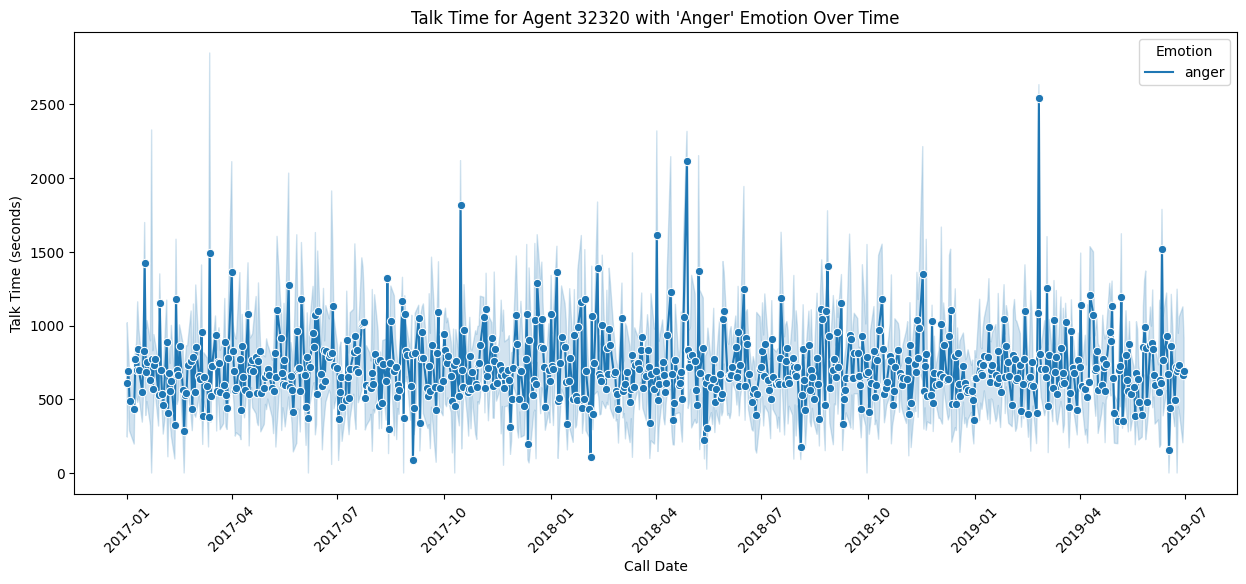

In [ ]:
def plot_talk_time_with_anger(agent_id, df):
    # Filter data for the specific agent and only 'anger' emotion
    agent_data = df[(df["Agent_ID"] == agent_id) & (df["Emotion"] == "anger")].sort_values(by="Call_Date")
    
    # Plotting
    plt.figure(figsize=(15, 6))
    sns.lineplot(x="Call_Date", y="Talk_Time", hue="Emotion", data=agent_data, marker='o', palette="tab10")
    
    plt.title(f"Talk Time for Agent {agent_id} with 'Anger' Emotion Over Time")
    plt.xlabel("Call Date")
    plt.ylabel("Talk Time (seconds)")
    
    # Setting x-ticks to show months and years
    plt.xticks(rotation=45)
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    
    plt.grid(True)
    plt.tight_layout()
    plt.legend(title="Emotion")
    plt.show()

# Plotting using Seaborn for the sample agent ID with only 'anger' emotion
plot_talk_time_with_anger(sample_agent_id, call_df)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

NameError: name 'mdates' is not defined

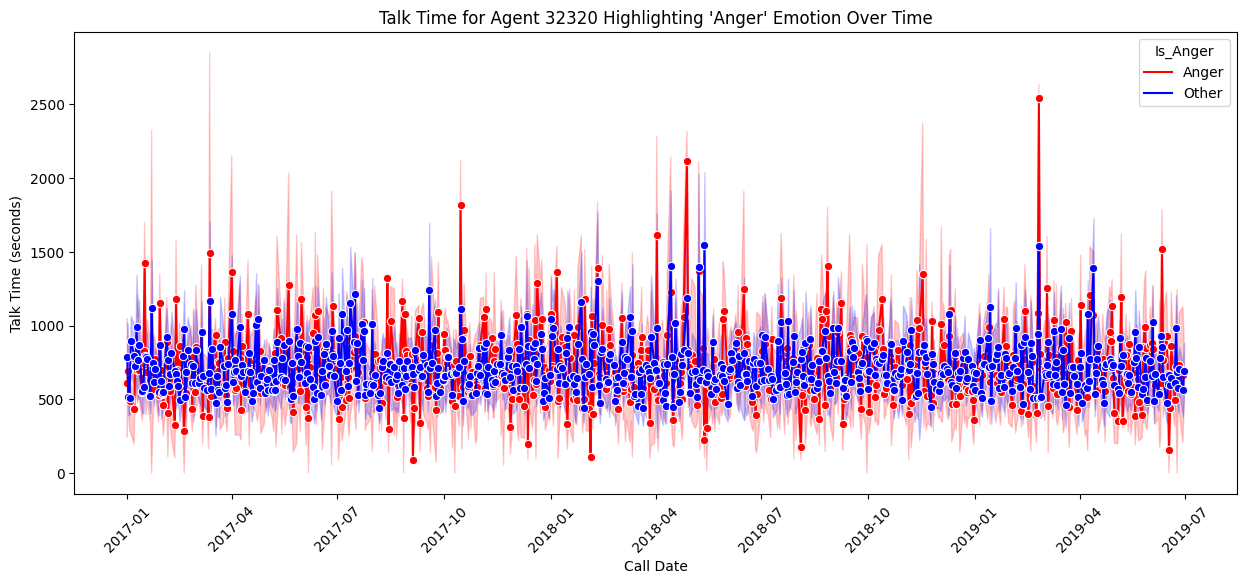

In [ ]:
def plot_talk_time_highlight_anger(agent_id, df):
    # Filter data for the specific agent
    agent_data = df[df["Agent_ID"] == agent_id].sort_values(by="Call_Date")
    
    # Add a new column to distinguish between 'anger' and other emotions
    agent_data["Is_Anger"] = agent_data["Emotion"].apply(lambda x: "Anger" if x == "anger" else "Other")
    
    # Plotting
    plt.figure(figsize=(15, 6))
    sns.lineplot(x="Call_Date", y="Talk_Time", hue="Is_Anger", data=agent_data, marker='o', palette={"Anger": "red", "Other": "blue"})
    
    plt.title(f"Talk Time for Agent {agent_id} Highlighting 'Anger' Emotion Over Time")
    plt.xlabel("Call Date")
    plt.ylabel("Talk Time (seconds)")
    
    # Setting x-ticks to show months and years
    plt.xticks(rotation=45)
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    
    plt.grid(True)
    plt.tight_layout()
    plt.legend(title="Emotion")
    plt.show()

# Plotting using Seaborn for the sample agent ID with 'anger' emotion highlighted in red
plot_talk_time_highlight_anger(sample_agent_id, call_df)
